In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import seaborn as sns



def evaluar_modelo(nombre, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='micro')
    rec = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')
    
    print(f"\n🔍 {nombre} — Evaluación Final:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    return {
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

resultados = []


def calcular_roc_auc(y_true, y_pred_proba, nombre_modelo="Modelo"):

    n_clases = len(np.unique(y_true))  # Número de clases
    roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='micro')
    
    plt.figure(figsize=(8, 6))
    
    # Calcular y graficar la curva ROC para cada clase
    for i in range(n_clases):
        # Para cada clase, tratamos a la clase i como positiva y el resto como negativa
        fpr, tpr, _ = roc_curve(y_true == i, y_pred_proba[:, i])  # binarizamos la clase i
        plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc_score(y_true == i, y_pred_proba[:, i]):.4f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC para {nombre_modelo}')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    plt.show()
    
    print(f"AUC (Área bajo la curva ROC) para {nombre_modelo}: {roc_auc:.4f}")
    for i in range(n_clases):
        class_auc = roc_auc_score(y_true == i, y_pred_proba[:, i])
        print(f"AUC para la Clase {i}: {class_auc:.4f}")
        
        
        
def graficar_matriz_confusion_heatmap(y_true, y_pred, modelo='Modelo'):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Matriz de Confusión - {modelo}")
    plt.tight_layout()
    plt.show()
    
def graficar_curva_aprendizaje(modelo, X, y, nombre_modelo):
    print(f"📈 Generando curva de aprendizaje para: {nombre_modelo}")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=modelo,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 5),
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validación')
    plt.title(f'Curva de Aprendizaje - {nombre_modelo}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Precisión')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Modelos de clasificación

Tamaño X_train: (33316032, 10)
Tamaño X_test: (8329008, 10)
Tamaño y_train: (33316032,)
Tamaño y_test: (8329008,)

-----------------------------------------------------------------------------------------------


🚀 Entrenando: XGBoost


/Users/carlafraguasvicente/opt/anaconda3/envs/tfm/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:16:29] WARNING: /private/var/folders/k3/_42t5dpj0cqg151lhftz_5vr0000gn/T/pip-install-h9mpx8a7/xgboost_5695785ab5d3490cac881dc83ae4e9d9/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⏱ Tiempo de entrenamiento: 1506.23 s

🔍 XGBoost — Evaluación Final:
Accuracy:  0.9925
Precision: 0.9925
Recall:    0.9925
F1 Score:  0.9925

🔍 XGBoost - Entrenamiento — Evaluación Final:
Accuracy:  0.9925
Precision: 0.9925
Recall:    0.9925
F1 Score:  0.9925

🔍 XGBoost - Test — Evaluación Final:
Accuracy:  0.9925
Precision: 0.9925
Recall:    0.9925
F1 Score:  0.9925


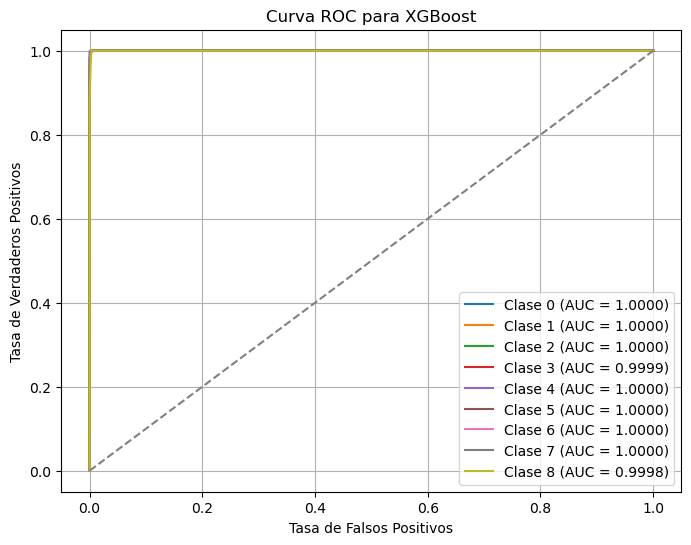

AUC (Área bajo la curva ROC) para XGBoost: 1.0000
AUC para la Clase 0: 1.0000
AUC para la Clase 1: 1.0000
AUC para la Clase 2: 1.0000
AUC para la Clase 3: 0.9999
AUC para la Clase 4: 1.0000
AUC para la Clase 5: 1.0000
AUC para la Clase 6: 1.0000
AUC para la Clase 7: 1.0000
AUC para la Clase 8: 0.9998


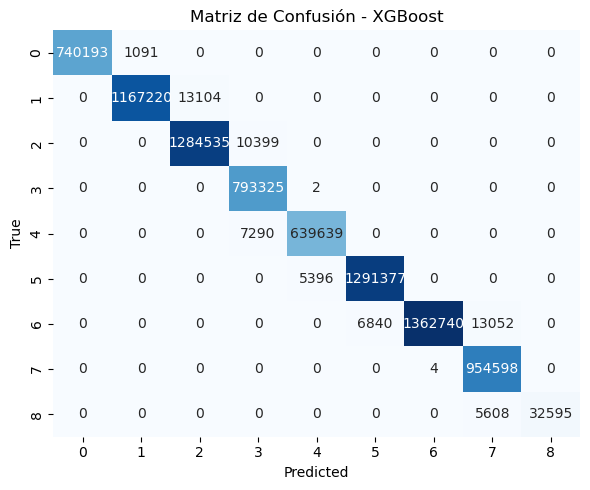


-----------------------------------------------------------------------------------------------


🚀 Entrenando: LightGBM
⏱ Tiempo de entrenamiento: 669.32 s

🔍 LightGBM — Evaluación Final:
Accuracy:  0.9918
Precision: 0.9918
Recall:    0.9918
F1 Score:  0.9918

🔍 LightGBM - Entrenamiento — Evaluación Final:
Accuracy:  0.9919
Precision: 0.9919
Recall:    0.9919
F1 Score:  0.9919

🔍 LightGBM - Test — Evaluación Final:
Accuracy:  0.9918
Precision: 0.9918
Recall:    0.9918
F1 Score:  0.9918


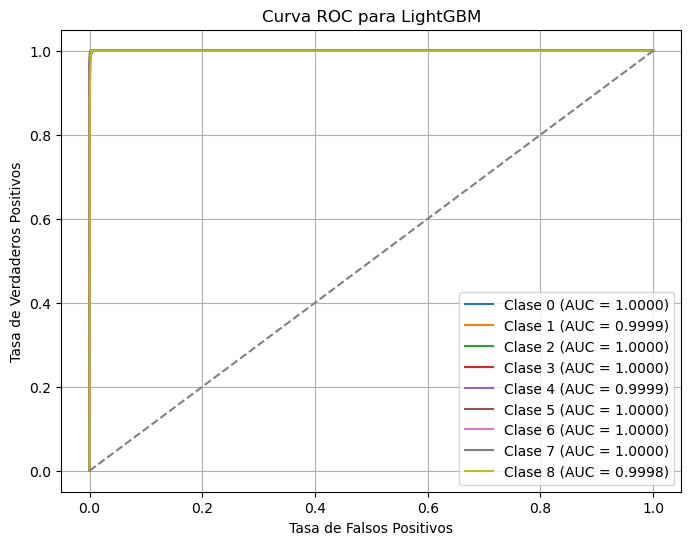

AUC (Área bajo la curva ROC) para LightGBM: 1.0000
AUC para la Clase 0: 1.0000
AUC para la Clase 1: 0.9999
AUC para la Clase 2: 1.0000
AUC para la Clase 3: 1.0000
AUC para la Clase 4: 0.9999
AUC para la Clase 5: 1.0000
AUC para la Clase 6: 1.0000
AUC para la Clase 7: 1.0000
AUC para la Clase 8: 0.9998


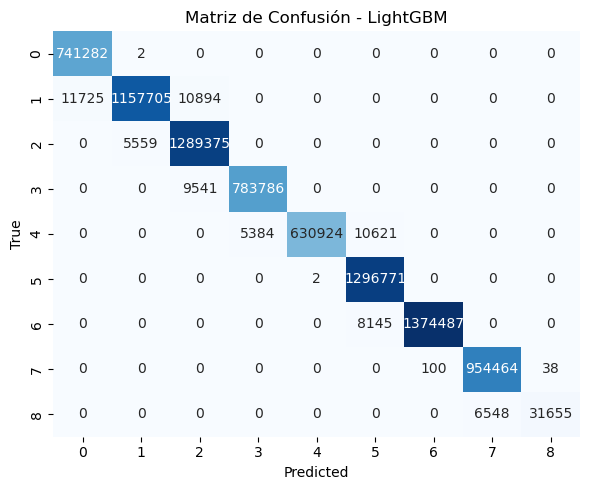


-----------------------------------------------------------------------------------------------


🚀 Entrenando: RandomForest
⏱ Tiempo de entrenamiento: 1471.48 s

🔍 RandomForest — Evaluación Final:
Accuracy:  0.9025
Precision: 0.9025
Recall:    0.9025
F1 Score:  0.9025

🔍 RandomForest - Entrenamiento — Evaluación Final:
Accuracy:  0.9026
Precision: 0.9026
Recall:    0.9026
F1 Score:  0.9026

🔍 RandomForest - Test — Evaluación Final:
Accuracy:  0.9025
Precision: 0.9025
Recall:    0.9025
F1 Score:  0.9025


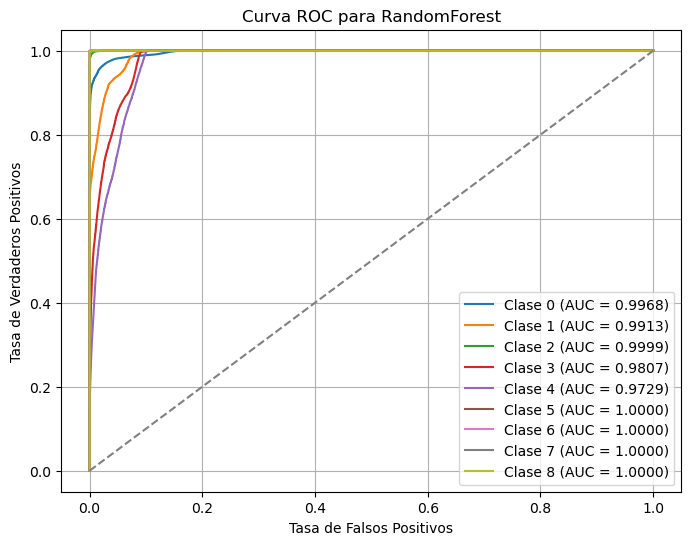

AUC (Área bajo la curva ROC) para RandomForest: 0.9958
AUC para la Clase 0: 0.9968
AUC para la Clase 1: 0.9913
AUC para la Clase 2: 0.9999
AUC para la Clase 3: 0.9807
AUC para la Clase 4: 0.9729
AUC para la Clase 5: 1.0000
AUC para la Clase 6: 1.0000
AUC para la Clase 7: 1.0000
AUC para la Clase 8: 1.0000


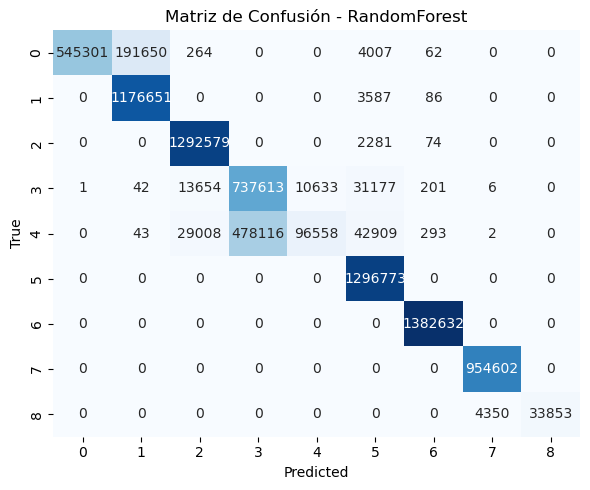


-----------------------------------------------------------------------------------------------


🚀 Entrenando: AdaBoost


/Users/carlafraguasvicente/opt/anaconda3/envs/tfm/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


⏱ Tiempo de entrenamiento: 25837.10 s

🔍 AdaBoost — Evaluación Final:
Accuracy:  0.6547
Precision: 0.6547
Recall:    0.6547
F1 Score:  0.6547

🔍 AdaBoost - Entrenamiento — Evaluación Final:
Accuracy:  0.6547
Precision: 0.6547
Recall:    0.6547
F1 Score:  0.6547

🔍 AdaBoost - Test — Evaluación Final:
Accuracy:  0.6547
Precision: 0.6547
Recall:    0.6547
F1 Score:  0.6547


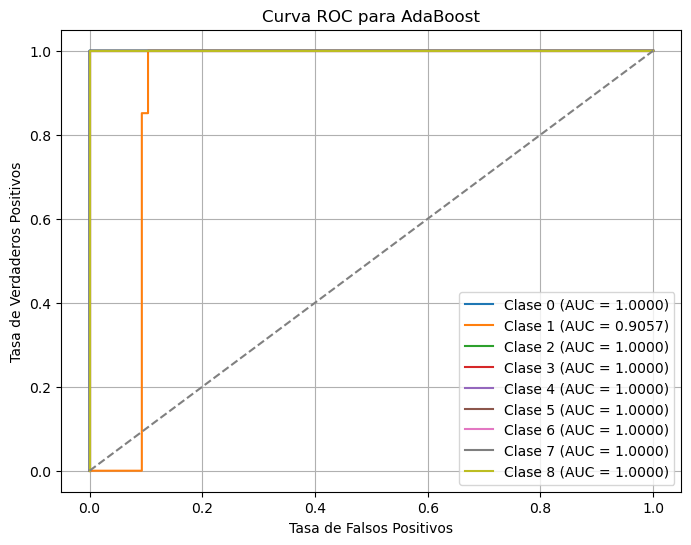

AUC (Área bajo la curva ROC) para AdaBoost: 0.9532
AUC para la Clase 0: 1.0000
AUC para la Clase 1: 0.9057
AUC para la Clase 2: 1.0000
AUC para la Clase 3: 1.0000
AUC para la Clase 4: 1.0000
AUC para la Clase 5: 1.0000
AUC para la Clase 6: 1.0000
AUC para la Clase 7: 1.0000
AUC para la Clase 8: 1.0000


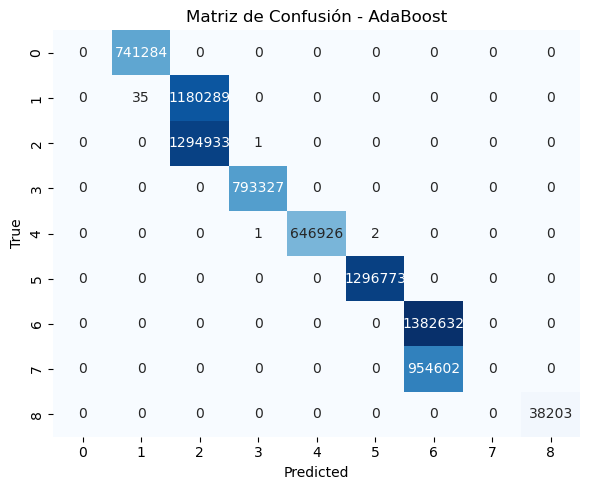


-----------------------------------------------------------------------------------------------


🚀 Entrenando: Bagging
⏱ Tiempo de entrenamiento: 9607.87 s

🔍 Bagging — Evaluación Final:
Accuracy:  0.7381
Precision: 0.7381
Recall:    0.7381
F1 Score:  0.7381

🔍 Bagging - Entrenamiento — Evaluación Final:
Accuracy:  0.7381
Precision: 0.7381
Recall:    0.7381
F1 Score:  0.7381

🔍 Bagging - Test — Evaluación Final:
Accuracy:  0.7381
Precision: 0.7381
Recall:    0.7381
F1 Score:  0.7381


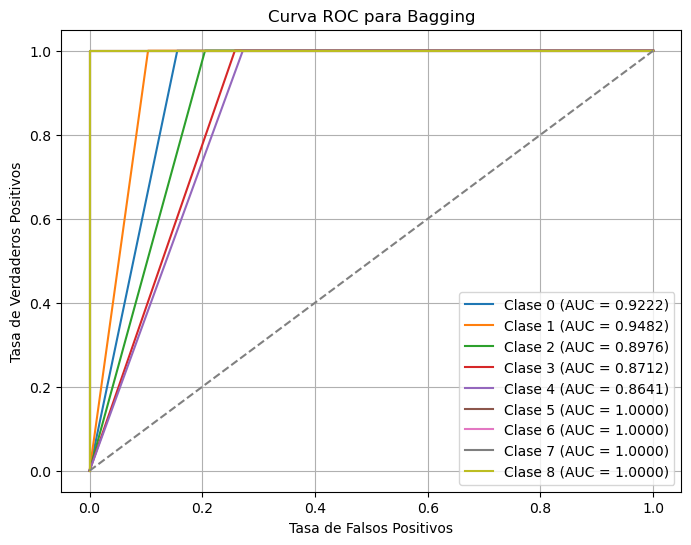

AUC (Área bajo la curva ROC) para Bagging: 0.9785
AUC para la Clase 0: 0.9222
AUC para la Clase 1: 0.9482
AUC para la Clase 2: 0.8976
AUC para la Clase 3: 0.8712
AUC para la Clase 4: 0.8641
AUC para la Clase 5: 1.0000
AUC para la Clase 6: 1.0000
AUC para la Clase 7: 1.0000
AUC para la Clase 8: 1.0000


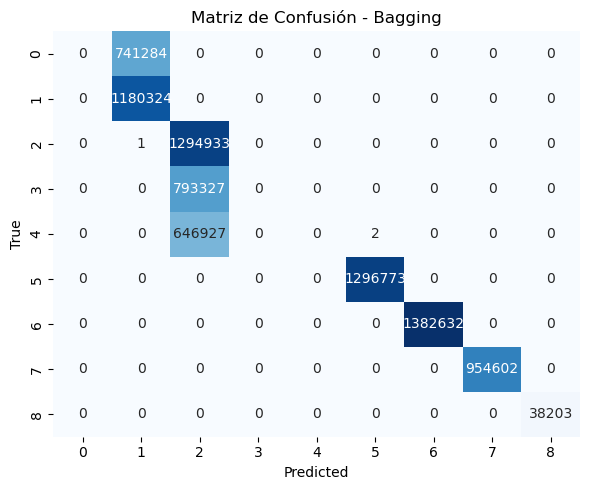


📊 Comparación final de modelos:

      Modelo  Accuracy  Precision   Recall  F1 Score  LogLoss  AUC  Tiempo (s)
     XGBoost  0.992462   0.992462 0.992462  0.992462 0.209693 None    1506.235
    LightGBM  0.991769   0.991769 0.991769  0.991769 0.041177 None     669.320
RandomForest  0.902456   0.902456 0.902456  0.902456 0.657021 None    1471.478
     Bagging  0.738079   0.738079 0.738079  0.738079 0.499969 None    9607.869
    AdaBoost  0.654679   0.654679 0.654679  0.654679 0.939921 None   25837.098


In [3]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# --------------------------
# CARGA DE LOS DATOS
# --------------------------

df_A = pd.read_csv('../data/final_dataset_A_date.csv', sep=',')
df_D = pd.read_csv('../data/final_dataset_D_date.csv', sep=',')

df_modeling_A = df_A.drop(columns=['fw', 'Time_Information'])
df_modeling_D = df_D.drop(columns=['fw', 'Time_Information'])
df_modeling = pd.concat([df_modeling_A, df_modeling_D])

bins = [0, 0.002, 0.008, 0.015, 0.02, 0.025, 0.04, 0.08, 0.3, 1.0] 
labels = ["0-0.002","0.002-0.008", "0.008-0.015", "0.015-0.02", "0.02-0.025", "0.025-0.04", "0.04-0.08","0.08-0.3", "0.3-1.0"]
df_modeling['rango_fwns'] = pd.cut(df_modeling['fwns'], bins=bins, labels=labels, include_lowest=True)

df_modeling.set_index(['lat_var', 'lon_var'], inplace=True)



# --------------------------
# CODIFICACIÓN DE LA VARIBALE OBJETIVO
# --------------------------

encoder = OrdinalEncoder()
df_modeling['rango_fwns_encoded'] = encoder.fit_transform(df_modeling[['rango_fwns']])


# --------------------------
# SEPARACIÓN DE LOS KEY DAYS
# --------------------------

# Key Days
key_days = [42.0, 137.0, 242.0, 319.0]

df_key_days = df_modeling[df_modeling['Date'].isin(key_days)].copy()

df = df_modeling[~df_modeling['Date'].isin(key_days)].copy()
df.reset_index(drop=False, inplace=True) 

X = df.drop(columns=['rango_fwns', 'rango_fwns_encoded', 'Date', 'lat_var', 'lon_var'])
y = df['rango_fwns_encoded']



# --------------------------
# DATOS DE ENTRADA
# --------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño X_train: {X_train.shape}')
print(f'Tamaño X_test: {X_test.shape}')
print(f'Tamaño y_train: {y_train.shape}')
print(f'Tamaño y_test: {y_test.shape}')
      

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --------------------------
# DEFINICIÓN DE MODELOS
# --------------------------
base_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

models = {
    "XGBoost": XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=7, alpha=1, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(objective='multiclass', num_class=len(np.unique(y)), boosting_type='gbdt',
                               num_leaves=31, learning_rate=0.05, feature_fraction=0.9, n_estimators=50, verbosity=-1, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=20, max_depth=7, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=300, learning_rate=0.5, random_state=42),
    "Bagging": BaggingClassifier(estimator=base_tree, n_estimators=100, max_samples=0.8, max_features=1.0, random_state=42)
}


# --------------------------
# EVALUACIÓN AUTOMÁTICA
# --------------------------
resultados = []

for nombre, modelo in models.items():
    print()
    print("-----------------------------------------------------------------------------------------------")
    print()
    print(f"\n🚀 Entrenando: {nombre}")
    start_time = time.time()
    
    modelo.fit(X_train_scaled, y_train)
    
    y_train_pred = modelo.predict(X_train_scaled)
    y_test_pred = modelo.predict(X_test_scaled)
    y_test_proba = modelo.predict_proba(X_test_scaled)
    
    elapsed = time.time() - start_time
    print(f"⏱ Tiempo de entrenamiento: {elapsed:.2f} s")
    
    # Evaluación personalizada
    resultado = evaluar_modelo(nombre, y_test, y_test_pred)
    
    evaluar_modelo(f'{nombre} - Entrenamiento', y_train, y_train_pred)
    evaluar_modelo(f'{nombre} - Test', y_test, y_test_pred)
    
    resultado["LogLoss"] = log_loss(y_test, y_test_proba)
    resultado["AUC"] = calcular_roc_auc(y_test, y_test_proba, nombre)
    resultado["Tiempo (s)"] = round(elapsed, 3)
    
    resultados.append(resultado)
    
    #curva aprendizaje
    #graficar_curva_aprendizaje(modelo, X_train_scaled, y_train, nombre)
    
    # Matriz de confusión
    graficar_matriz_confusion_heatmap(y_test, y_test_pred, modelo=nombre)

    
# --------------------------
# COMPARACIÓN FINAL
# --------------------------
df_resultados = pd.DataFrame(resultados).sort_values(by="Accuracy", ascending=False)
print("\n📊 Comparación final de modelos:\n")
print(df_resultados.to_string(index=False))

# Modelos de regresión

In [2]:
# import pandas as pd
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor  # si quieres, puedes agregarlo también

# --------------------------
# CARGA DE DATOS
# --------------------------
df_A = pd.read_csv('../data/final_dataset_A_date.csv', sep=',')
df_D = pd.read_csv('../data/final_dataset_D_date.csv', sep=',')

columns_to_drop = ['fw', 'lat_var', 'lon_var', 'Time_Information']
df_modeling_A = df_A.drop(columns=columns_to_drop)
df_modeling_D = df_D.drop(columns=columns_to_drop)

df_modeling = pd.concat([df_modeling_A, df_modeling_D]).reset_index(drop=True)


# --------------------------
# KEY DAYS
# --------------------------

key_days = [42.0, 137.0, 242.0, 319.0]

df_key_days = df_modeling[df_modeling['Date'].isin(key_days)].copy()
df = df_modeling[~df_modeling['Date'].isin(key_days)].copy()
df.reset_index(drop=False, inplace=True) 

print(f'Tamaño df: {df.shape}')
print(f'Tamaño df_key_days: {df_key_days.shape}')


# --------------------------
# VARIABLES INDEPENDIENTES Y DEPENDIENTE
# --------------------------
y = df['fwns']
X = df.drop(columns=['fwns', 'Date'])


# Divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño X_train: {X_train.shape}')
print(f'Tamaño X_test: {X_test.shape}')
print(f'Tamaño y_train: {y_train.shape}')
print(f'Tamaño y_test: {y_test.shape}')


# --------------------------
# NORMALIZACIÓN DE LOS DATOS
# --------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --------------------------
# MODELOS A EVALUAR
# --------------------------

base_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    #"Ridge": Ridge(alpha=0.1),
    #"Lasso": Lasso(alpha=0.00001),
    "Bagging": BaggingRegressor(estimator=base_tree, n_estimators=20, random_state=42),
    #"ElasticNet": ElasticNet(alpha=0.00001, l1_ratio=0.5, random_state=42),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=100, solver='adam', alpha=0.0001, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=40, min_samples_split=20, min_samples_leaf=20 ,random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=20, max_depth=40, min_samples_split=20, min_samples_leaf=20),
    #"MLPRegressor": MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=100, solver='adam', alpha=0.0001, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=20, learning_rate=0.1, max_depth=15, verbosity=0, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.5, max_depth=12),
    "AdaBoost": AdaBoostRegressor(estimator=base_tree, n_estimators=40, learning_rate=0.1, random_state=42)
}

# --------------------------
# EVALUACIÓN
# --------------------------
results = []

for name, model in models.items():
    print()
    print("-----------------------------------------------------------------------------------------------")
    print()
    print(f"Entrenando: {name}")
    start_time = time.time()
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    elapsed_time = time.time() - start_time
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    '''
        # Métricas test
    mae_test = mean_absolute_error(y_test, y_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    
    # Métricas train
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    results.append({
        "Modelo": name,
        "MAE_train": mae_train,
        "RMSE_train": rmse_train,
        "R²_train": r2_train,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "R²_test": r2_test,
        "Tiempo": round(elapsed_time, 4)
    })
    
    '''
    
    results.append({
        "Modelo": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "Tiempo": round(elapsed_time, 4)
    })

# --------------------------
# MOSTRAR RESULTADOS
# --------------------------
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\nComparación de modelos:")
print(results_df.to_string(index=False))

Tamaño df: (41645040, 12)
Tamaño df_key_days: (452427, 11)
Tamaño X_train: (33316032, 10)
Tamaño X_test: (8329008, 10)
Tamaño y_train: (33316032,)
Tamaño y_test: (8329008,)

-----------------------------------------------------------------------------------------------

Entrenando: LinearRegression

-----------------------------------------------------------------------------------------------

Entrenando: Bagging

-----------------------------------------------------------------------------------------------

Entrenando: MLPRegressor

-----------------------------------------------------------------------------------------------

Entrenando: DecisionTree

-----------------------------------------------------------------------------------------------

Entrenando: RandomForest

-----------------------------------------------------------------------------------------------

Entrenando: XGBoost

----------------------------------------------------------------------------------------------

# Key days

In [4]:
import pandas as pd

# --------------------------
# CARGA DE DATOS
# --------------------------
df_A = pd.read_csv('../data/final_dataset_A_date.csv', sep=',')
df_D = pd.read_csv('../data/final_dataset_D_date.csv', sep=',')

df_modeling = pd.concat([df_A, df_D]).reset_index(drop=True)


# --------------------------
# KEY DAYS
# --------------------------

key_days = [42.0, 137.0, 242.0, 319.0]

df_key_days = df_modeling[df_modeling['Date'].isin(key_days)].copy()
#dates = df_key_days['Date'].copy()
#latitudes = df_key_days['lat_var'].copy()
#longitudes = df_key_days['lon_var'].copy()
df_key_days.reset_index(drop=False, inplace=True) 


# --------------------------
# PREDICCIONES Y ERRORES (por día y modelo)
# --------------------------

df_preds_por_modelo = {}
errores_por_modelo = {}

for nombre, modelo in models.items():
    predicciones_modelo = []
    errores_modelo = []

    for day in key_days:
        # Filtrar los datos del día actual
        df_day = df_modeling[df_modeling['Date'] == day].copy()
        df_day.reset_index(drop=False, inplace=True) 
        

        # Guardar variables auxiliares
        lat_day = df_day['lat_var'].copy()
        lon_day = df_day['lon_var'].copy()
        y_true_day = df_day['fwns'] 
        X_day = df_day.drop(columns=['Date', 'lat_var', 'lon_var', 'fwns', 'lat_var', 'lon_var', 'fw', 'Time_Information'])

        # Escalar
        X_scaled_day = scaler.transform(X_day)

        # Predicción
        y_pred_day = modelo.predict(X_scaled_day)


        # Guardar predicciones
        df_error = pd.DataFrame({
            "modelo": nombre,
            "Date": day,
            "lat": lat_day,
            "lon": lon_day,
            "Real": y_true_day,
            "Predicho": y_pred_day,
        })
        df_error["Error"] = df_error["Real"] - df_error["Predicho"]
        df_error["Error_magnitud"] = (df_error["Real"] - df_error["Predicho"]).abs()
        errores_modelo.append(df_error)

    # Guardar en diccionarios
    errores_por_modelo[nombre] = pd.concat(errores_modelo, ignore_index=True)

df_errores = pd.concat([df.assign(modelo=nombre) for nombre, df in errores_por_modelo.items()],ignore_index=True)




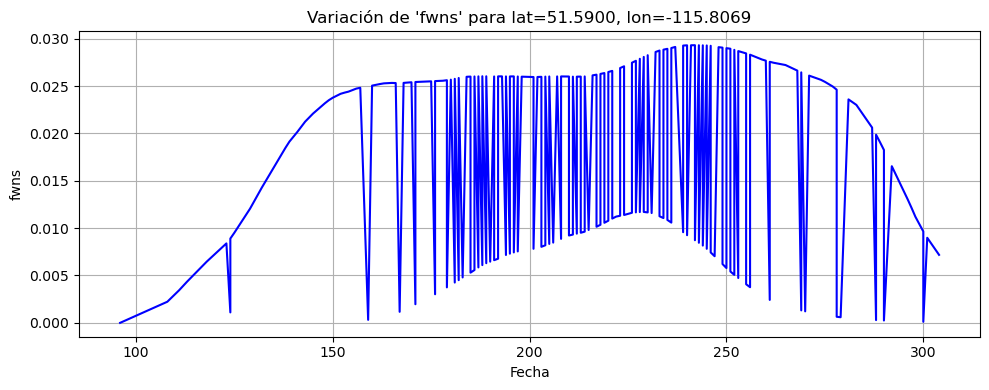

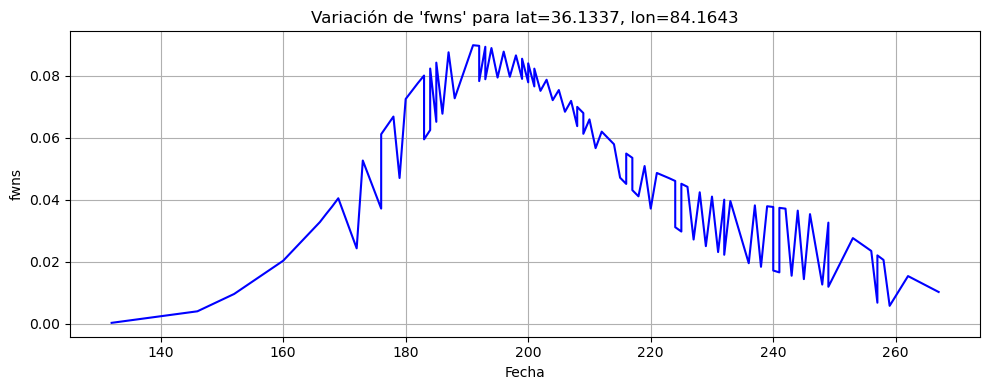

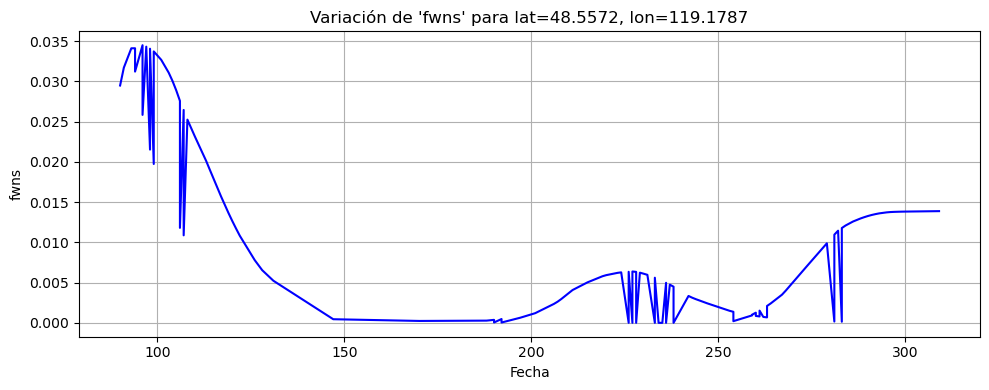

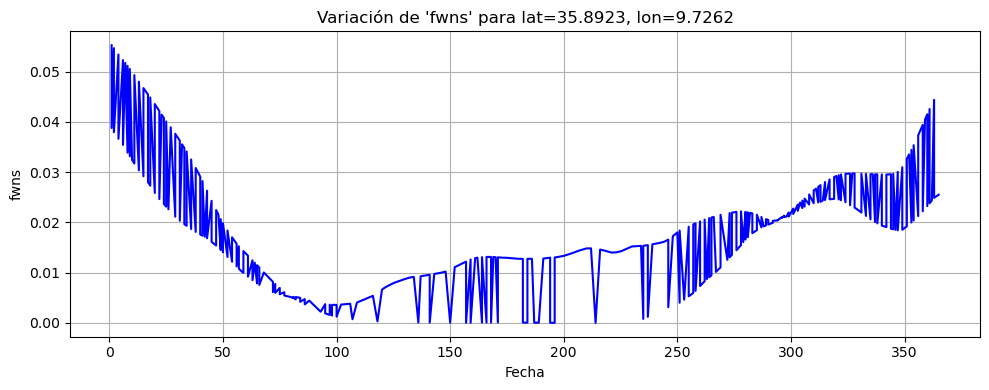

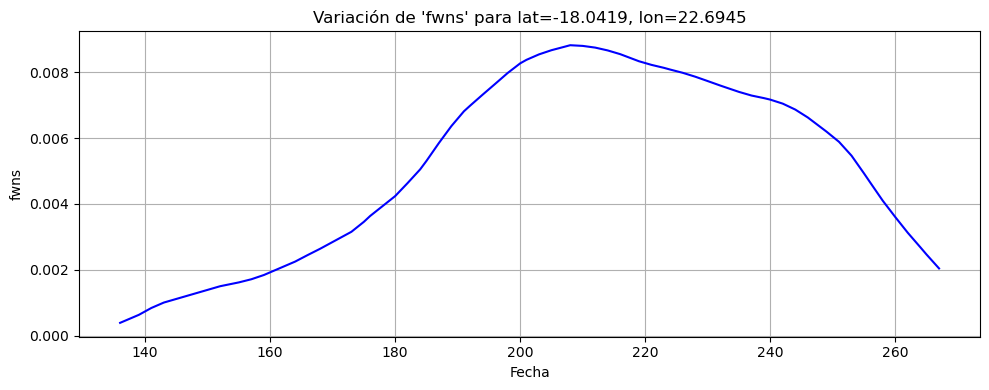

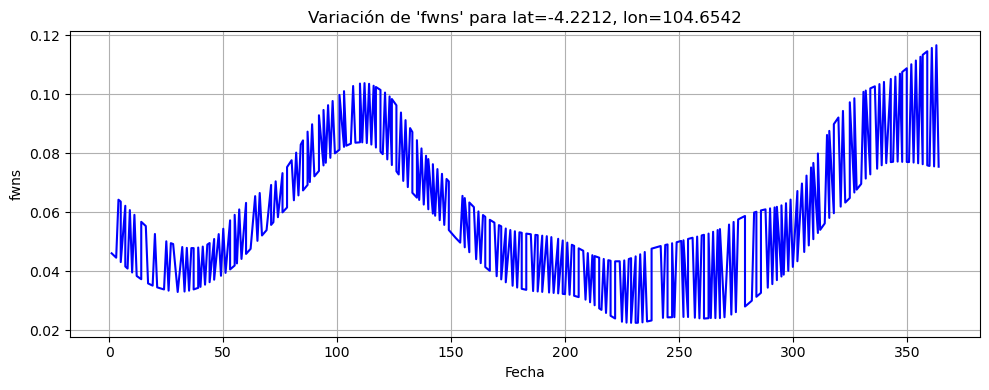

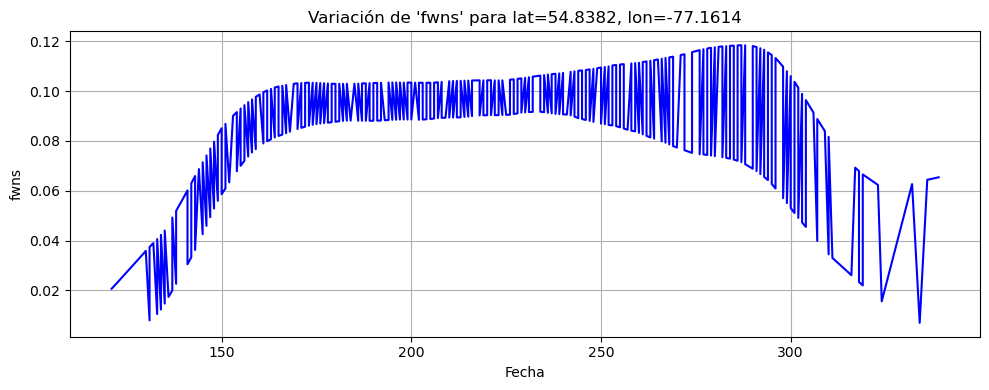

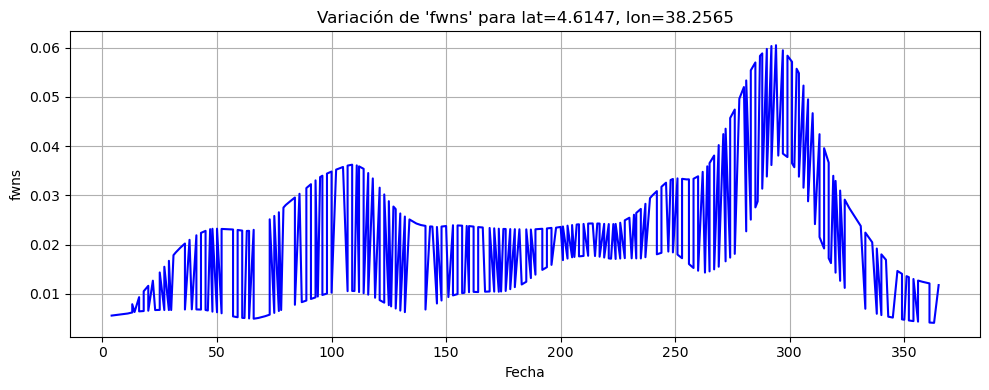

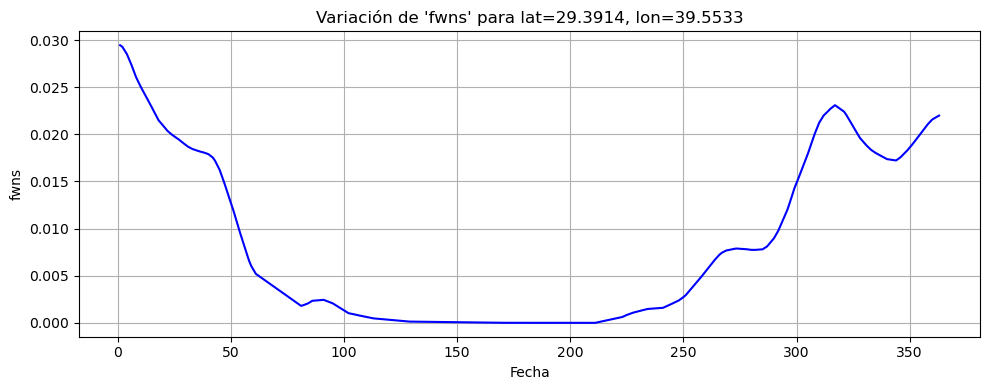

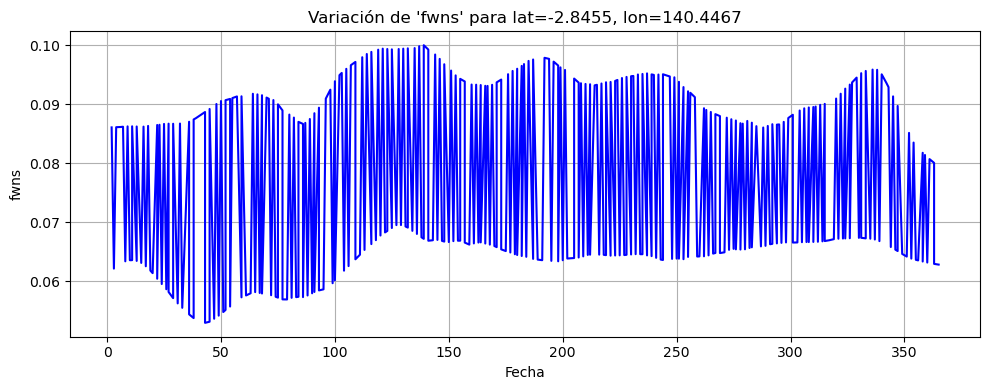

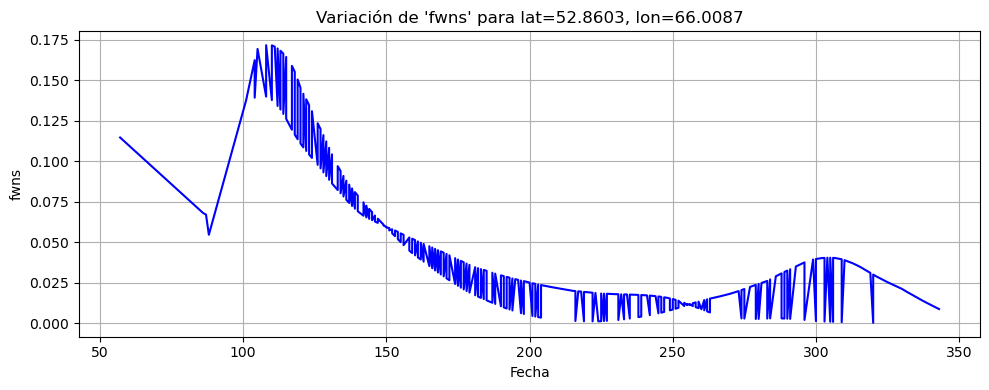

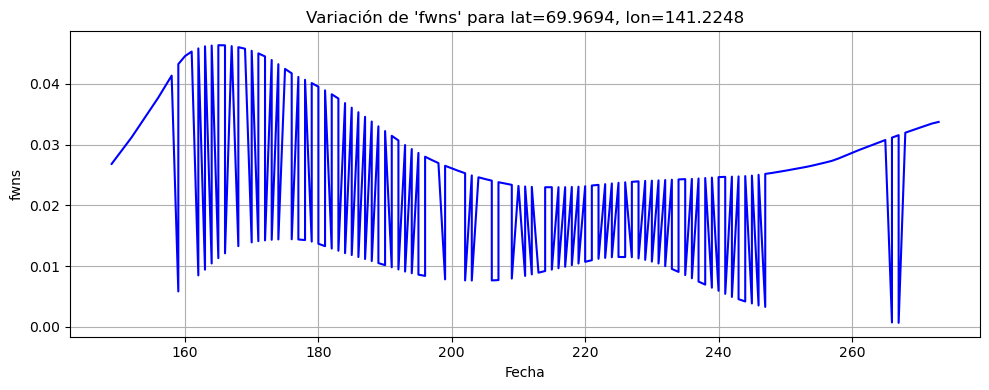

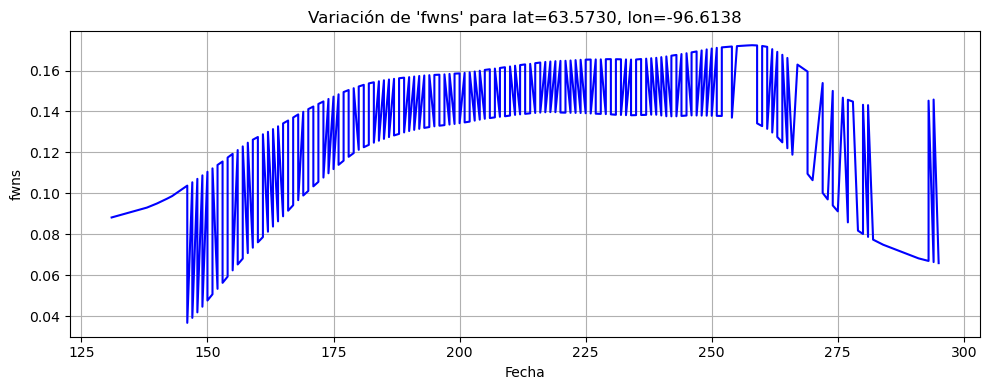

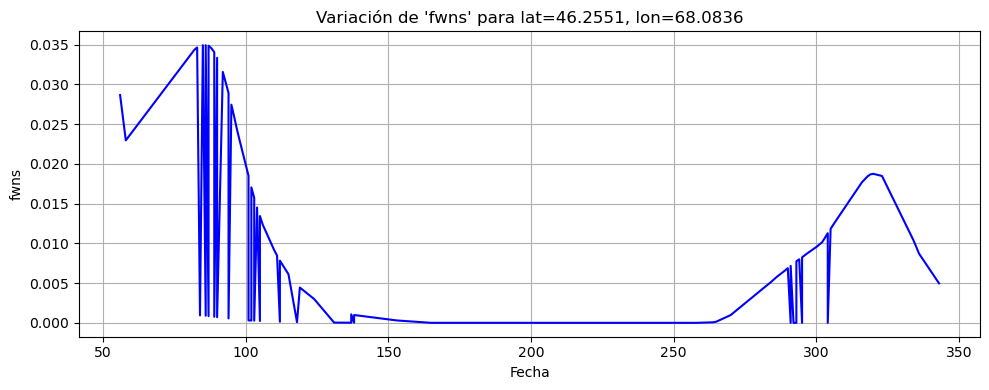

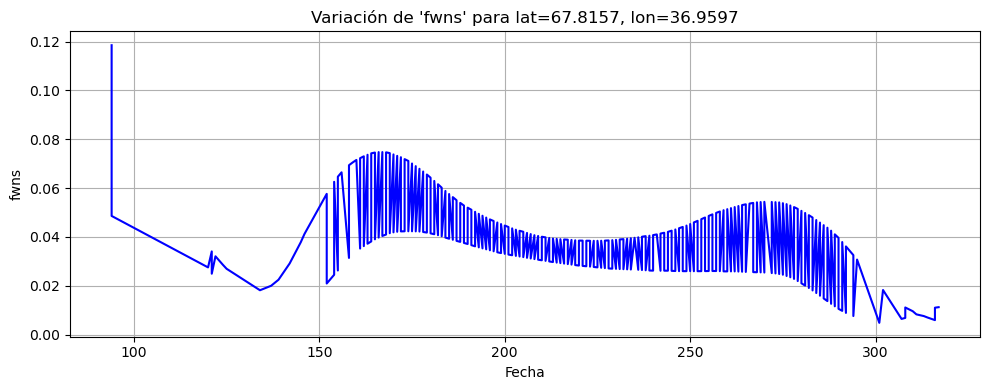

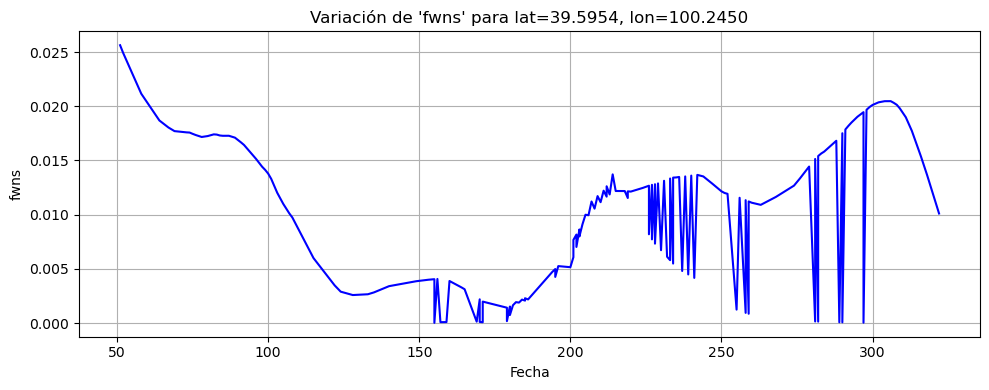

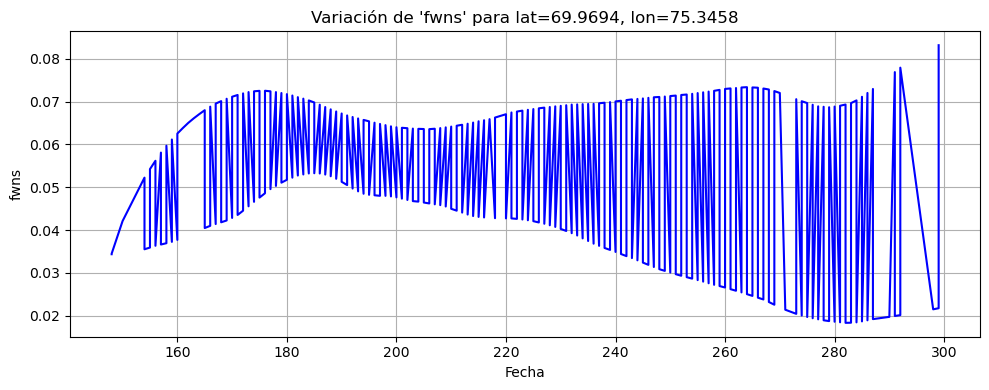

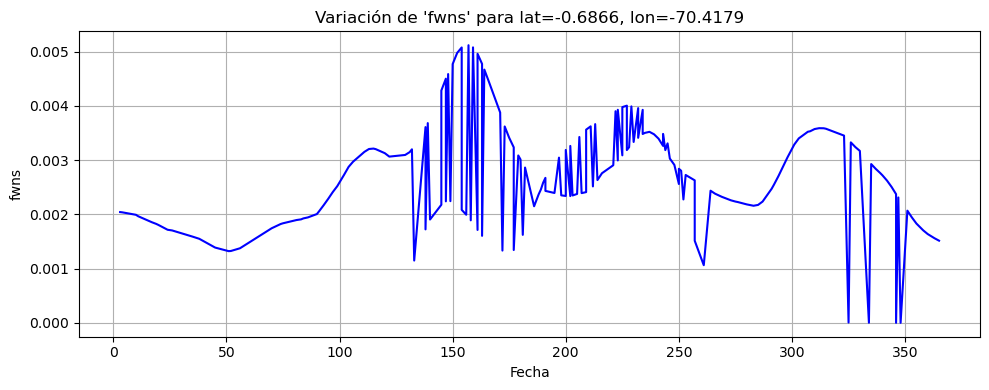

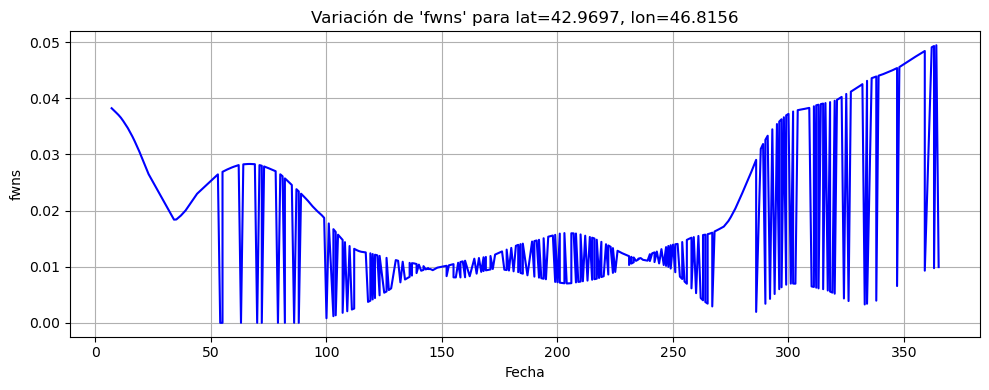

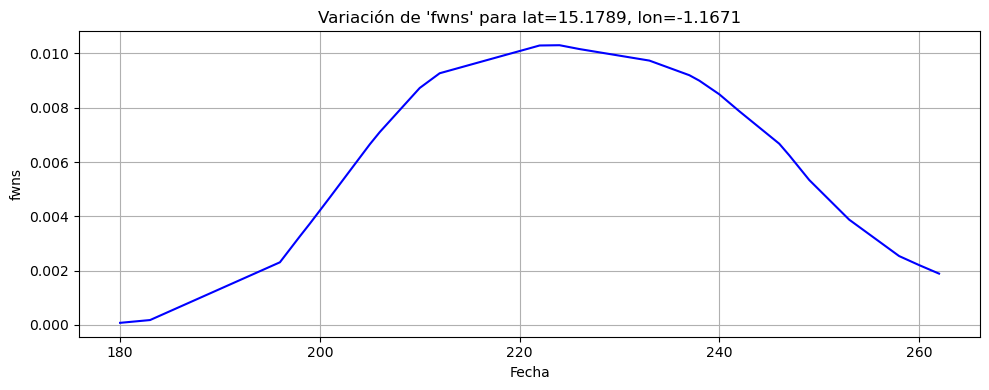

In [100]:
'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Seleccionar 20 píxeles únicos aleatorios de df_errores_modelo
coordenadas_unicas = df_errores[["lat", "lon"]].drop_duplicates()
coordenadas_muestra = coordenadas_unicas.sample(n=20, random_state=10).reset_index(drop=True)

# Tolerancia para hacer match (en caso de coordenadas flotantes con diferencia mínima)
tol = 1e-4

# Recorrer cada coordenada y extraer la serie temporal de 'fwns'
for i, row in coordenadas_muestra.iterrows():
    lat, lon = row["lat"], row["lon"]

    # Filtrar df_modeling para esa coordenada
    df_pixel = df_modeling[
        (np.abs(df_modeling["lat_var"] - lat) < tol) &
        (np.abs(df_modeling["lon_var"] - lon) < tol)
    ].copy()

    if df_pixel.empty:
        print(f"Coordenada {lat}, {lon} no encontrada en df_modeling (dentro del margen de tolerancia).")
        continue

    df_pixel = df_pixel.sort_values("Date")

    # Graficar la serie de fwns
    plt.figure(figsize=(10, 4))
    plt.plot(df_pixel["Date"], df_pixel["fwns"], label="fwns", color="blue")
    plt.title(f"Variación de 'fwns' para lat={lat:.4f}, lon={lon:.4f}")
    plt.xlabel("Fecha")
    plt.ylabel("fwns")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
'''

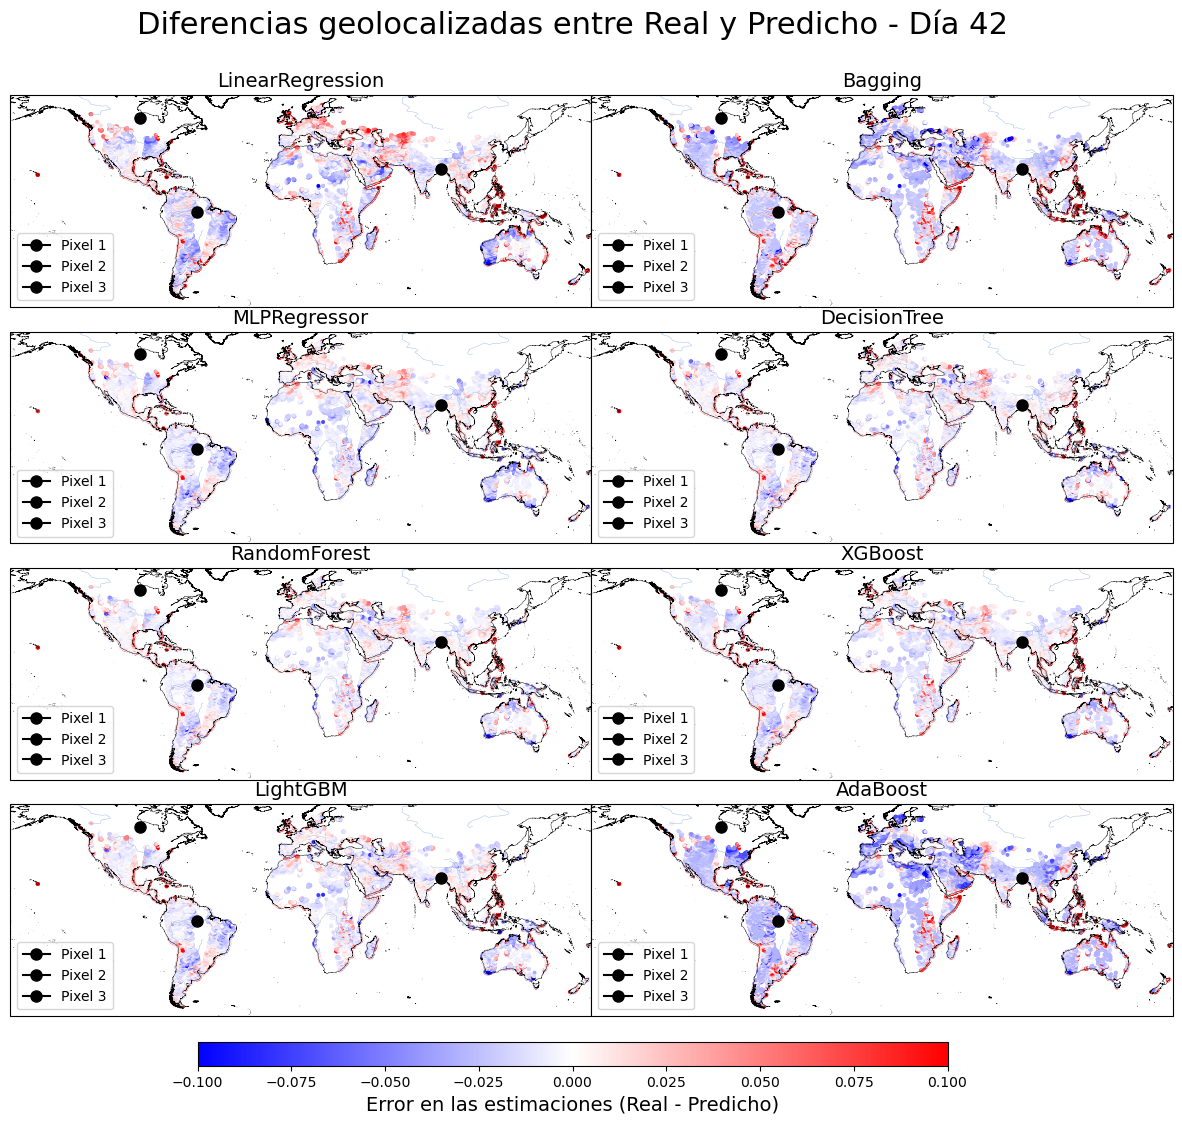

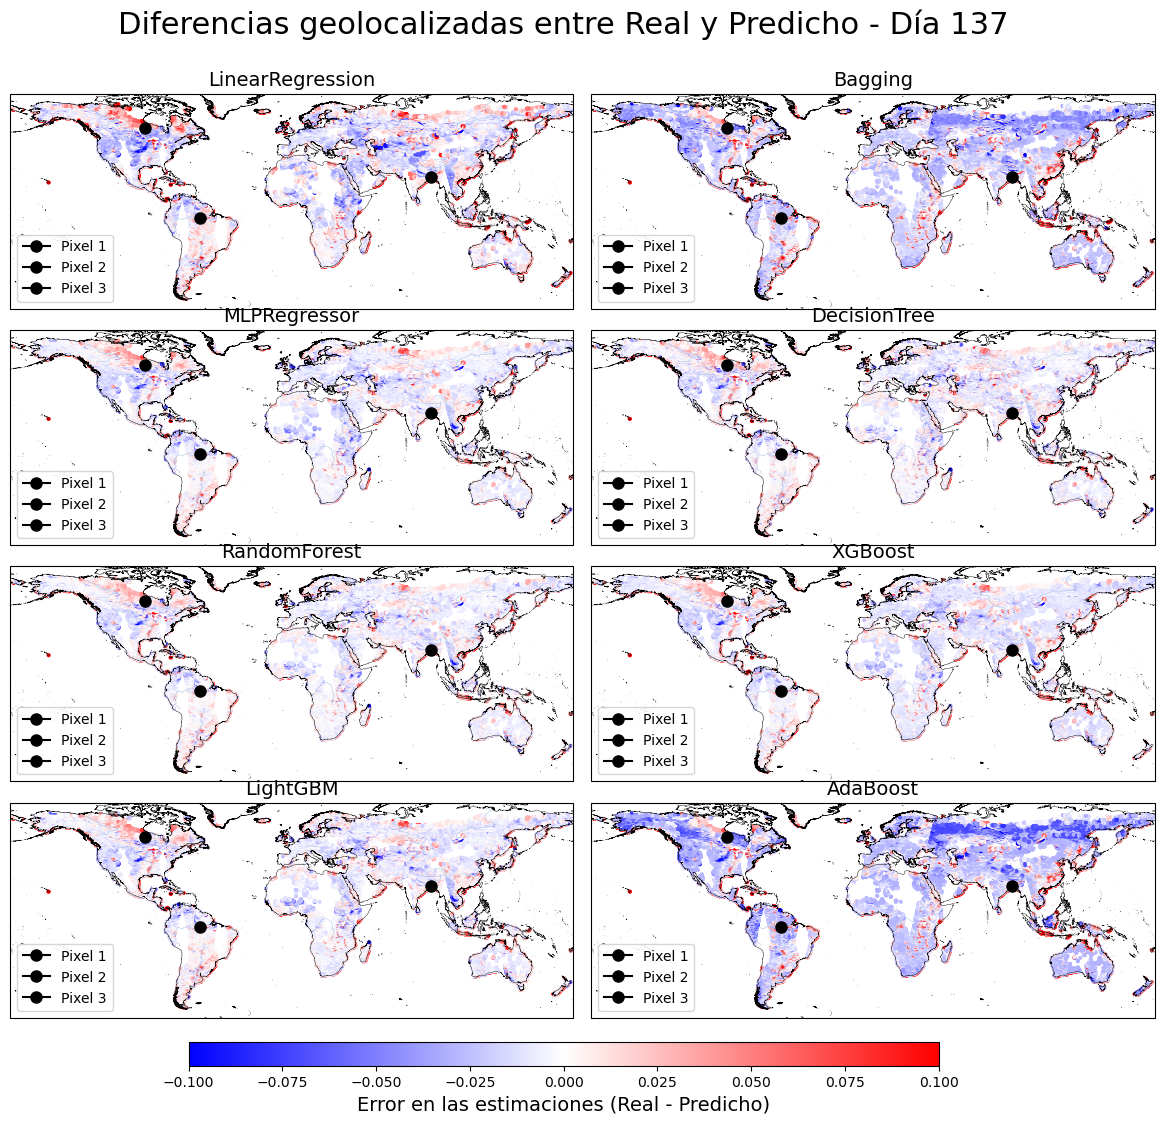

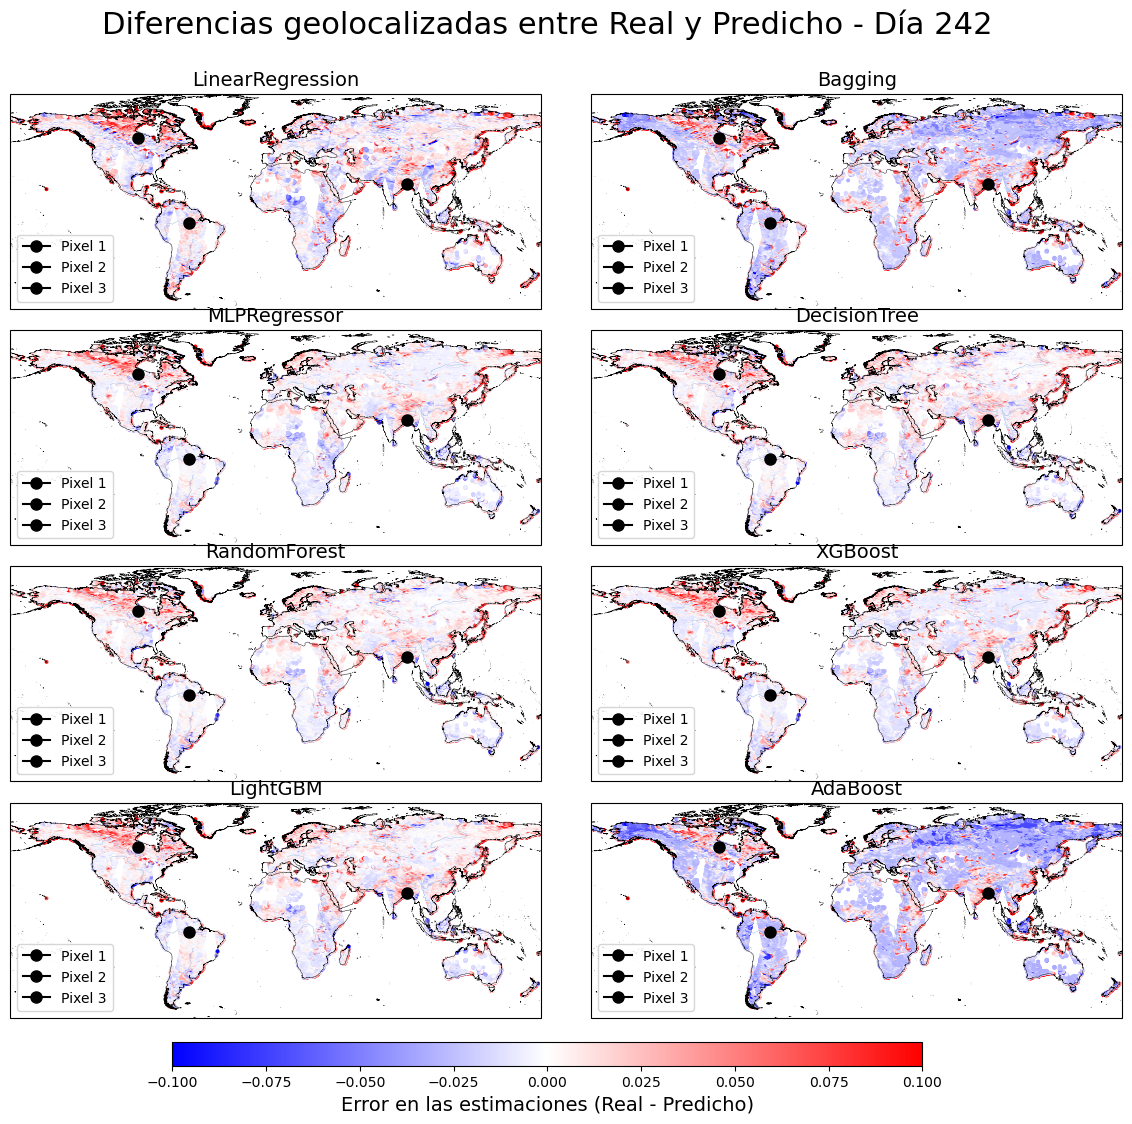

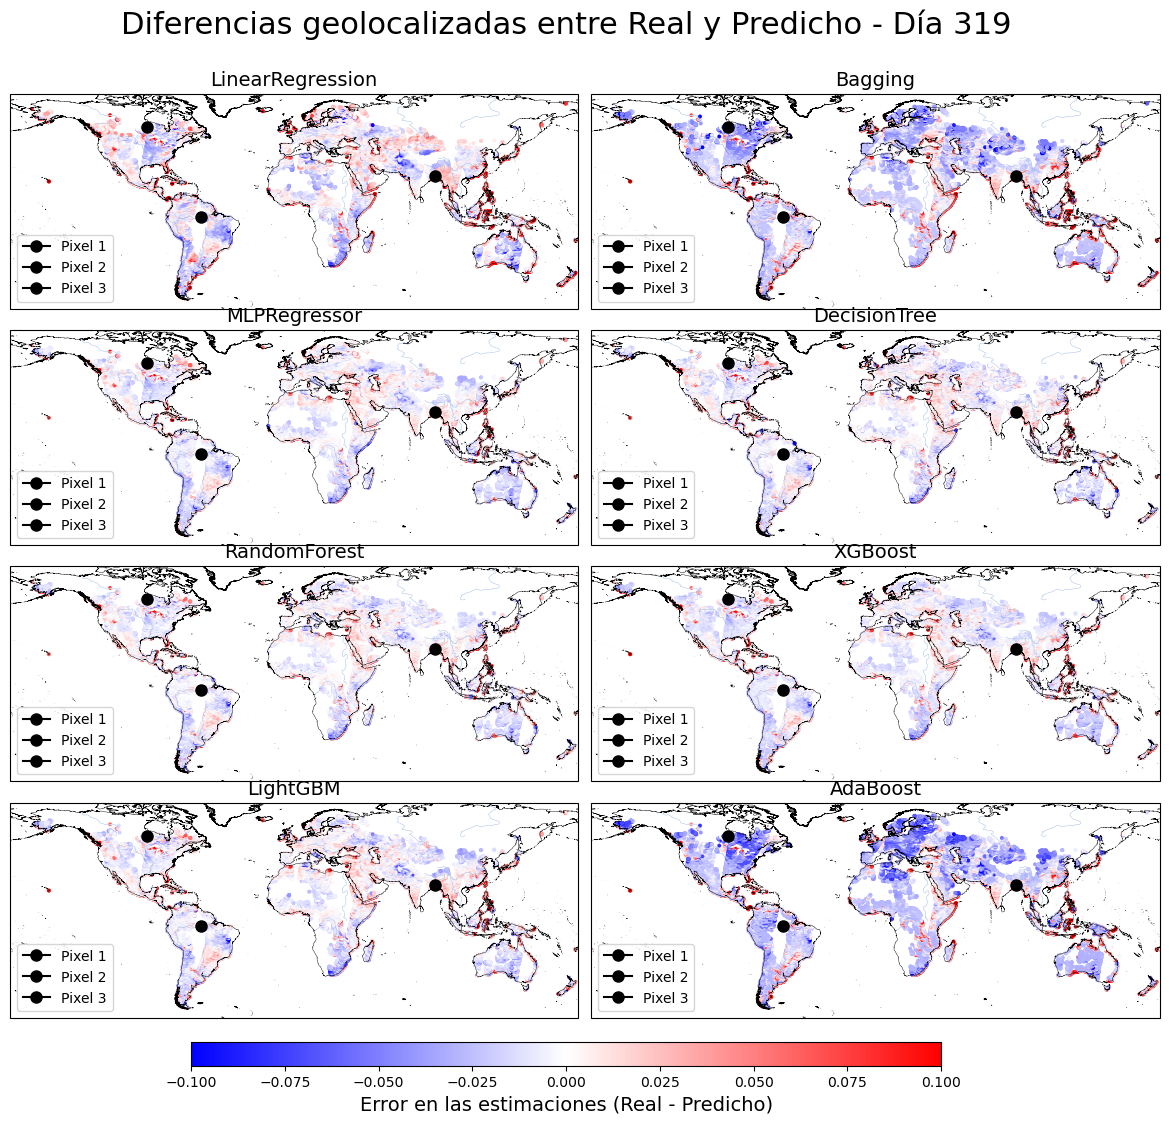

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import numpy as np

# Lista de días clave
key_days = [42.0, 137.0, 242.0, 319.0]

# Coordenadas puntuales a marcar
coordenadas_puntos = [
    {"lat": 23.0632, "lon": 89.0922, "color": "black", "label": "Pixel 1"},
    {"lat": -3.2384, "lon": -58.7464, "color": "black", "label": "Pixel 2"},
    {"lat": 54.1685, "lon": -93.5014, "color": "black", "label": "Pixel 3"}
]

# Modelos únicos
modelos_unicos = df_errores["modelo"].unique()

# Loop por día
for day in key_days:
    # Crear figura
    fig = plt.figure(figsize=(15, 12))
    cols = 2
    rows = int(np.ceil(len(modelos_unicos) / cols))
    gs = gridspec.GridSpec(rows, cols, figure=fig, wspace=0.0, hspace=0.1)

    for i, modelo_objetivo in enumerate(modelos_unicos):
        df_modelo = df_errores[df_errores["modelo"] == modelo_objetivo]
        df_day = df_modelo[df_modelo["Date"] == day]

        ax = fig.add_subplot(gs[i // cols, i % cols], projection=ccrs.PlateCarree())
        ax.set_title(f"{modelo_objetivo}", fontsize=14)

        # Fondo geográfico
        ax.coastlines(resolution='10m', linewidth=0.3)
        ax.add_feature(cfeature.LAND, facecolor='white')
        ax.add_feature(cfeature.OCEAN, facecolor='white')
        ax.add_feature(cfeature.LAKES, facecolor='white')
        ax.add_feature(cfeature.RIVERS, linewidth=0.3)

        # Marcar puntos
        for coord in coordenadas_puntos:
            ax.plot(
                coord["lon"], coord["lat"],
                marker='o',
                color=coord["color"],
                markersize=8,
                transform=ccrs.PlateCarree(),
                label=coord["label"]
            )

        # Scatter errores con colorbar fijo
        sc = ax.scatter(
            df_day["lon"], df_day["lat"],
            c=df_day["Error"],
            cmap="bwr", vmin=-0.1, vmax=0.1,
            s=8, edgecolor="none",
            transform=ccrs.PlateCarree()
        )

        ax.legend(loc='lower left', fontsize=10)

    # Barra de color única
    cbar_ax = fig.add_axes([0.25, 0.07, 0.5, 0.02])
    cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
    cbar.set_label("Error en las estimaciones (Real - Predicho)", fontsize=14)

    # Título general
    fig.suptitle(f"Diferencias geolocalizadas entre Real y Predicho - Día {int(day)}", fontsize=22, y=0.95)

    plt.show()


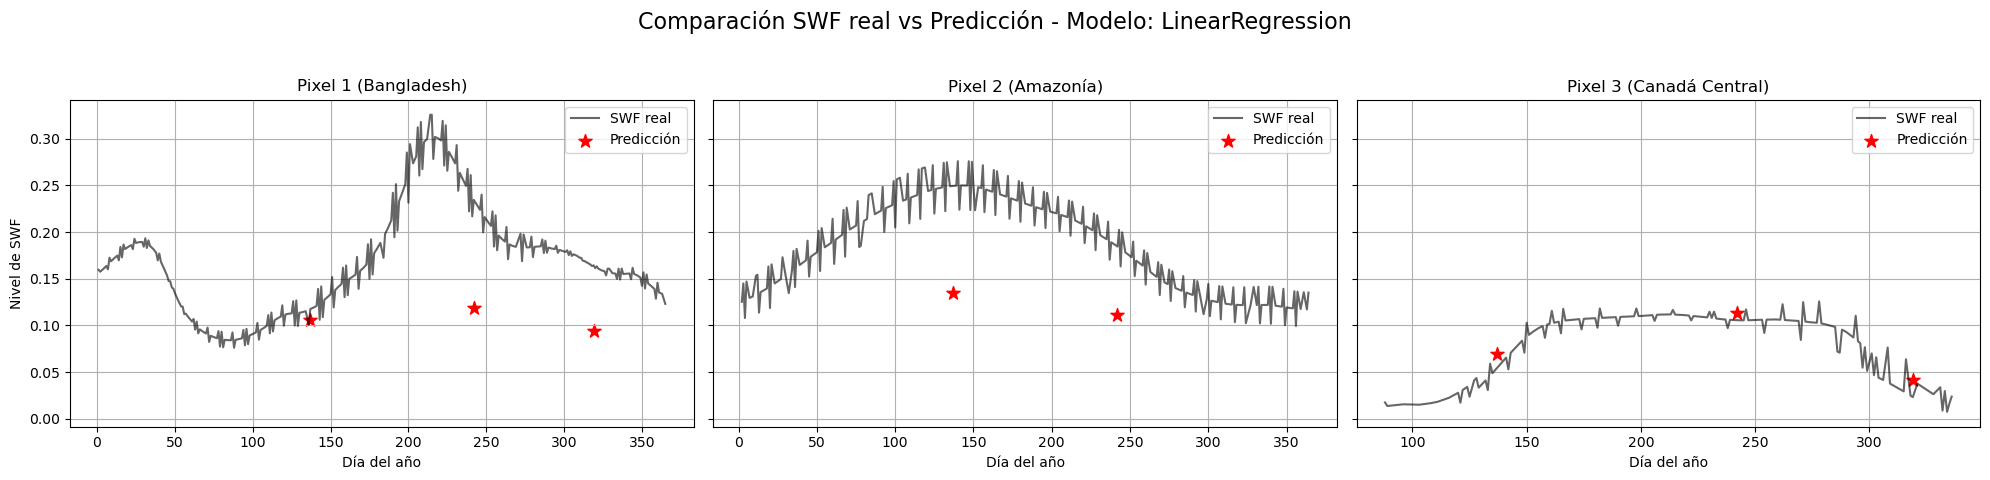

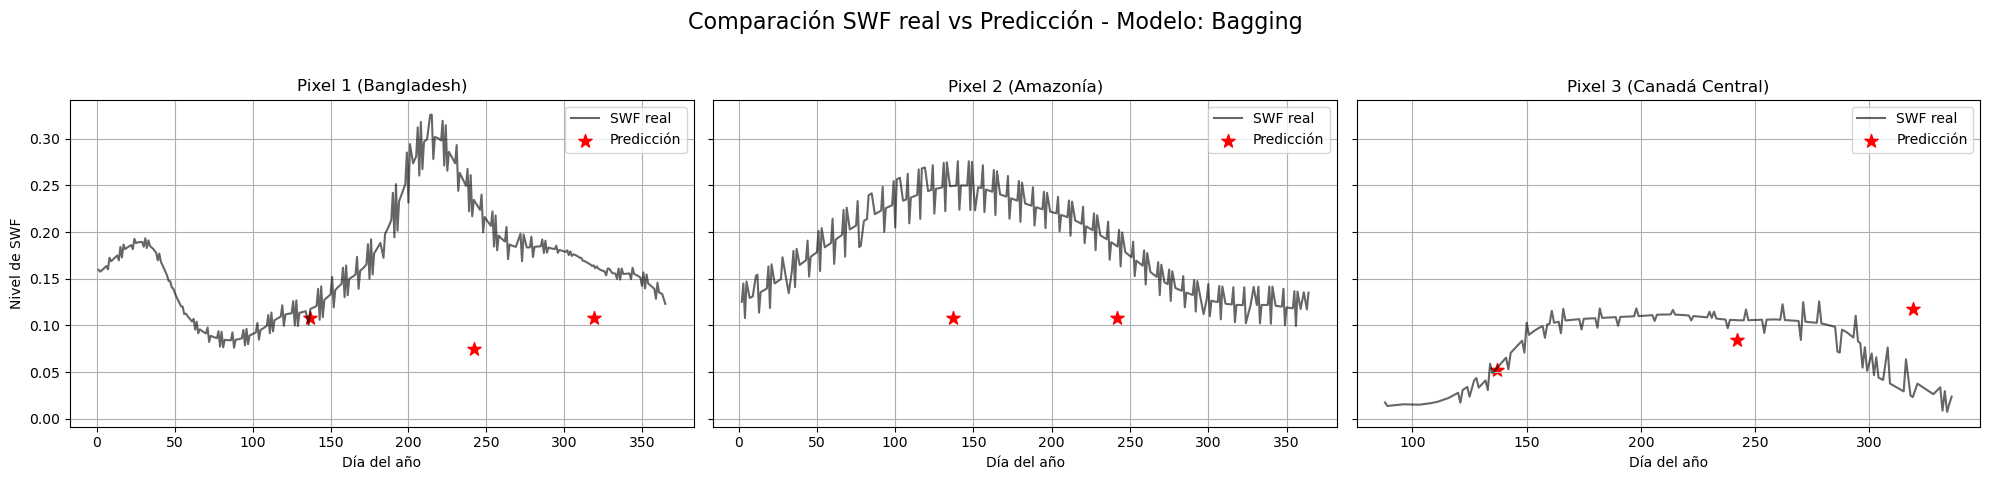

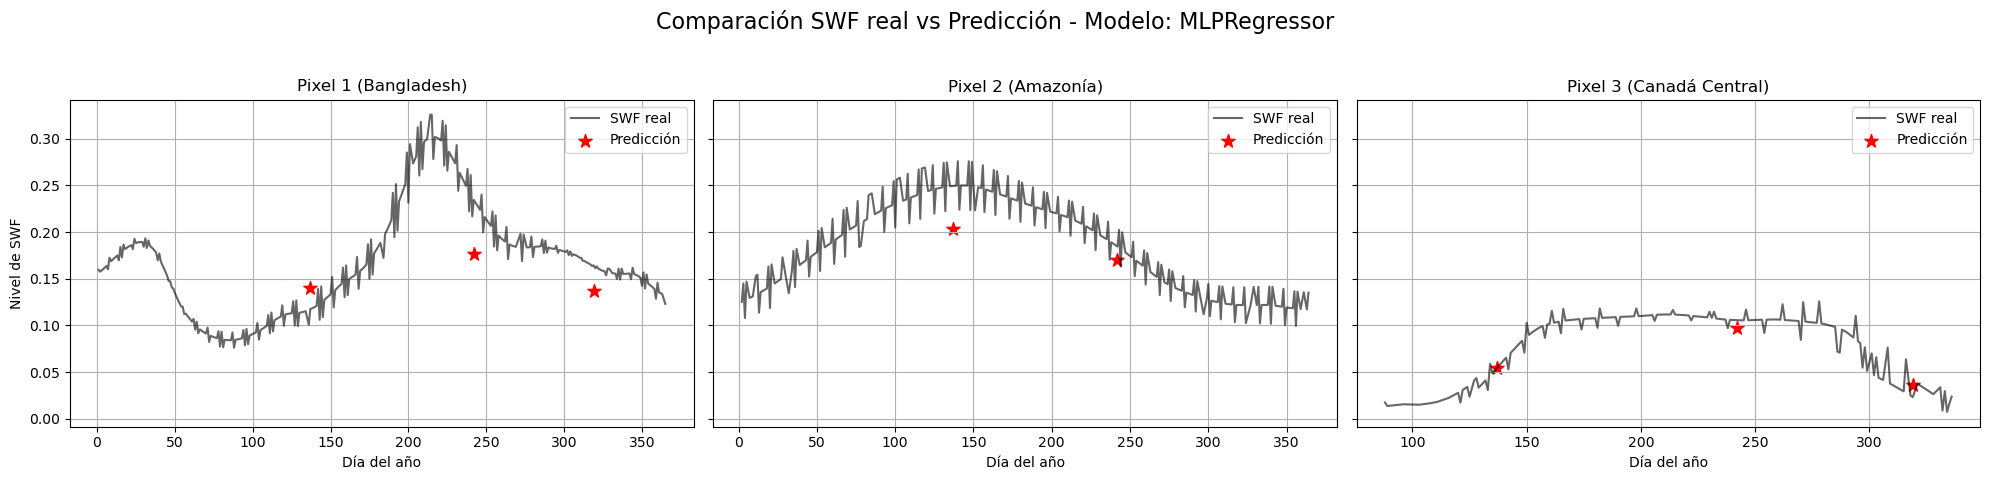

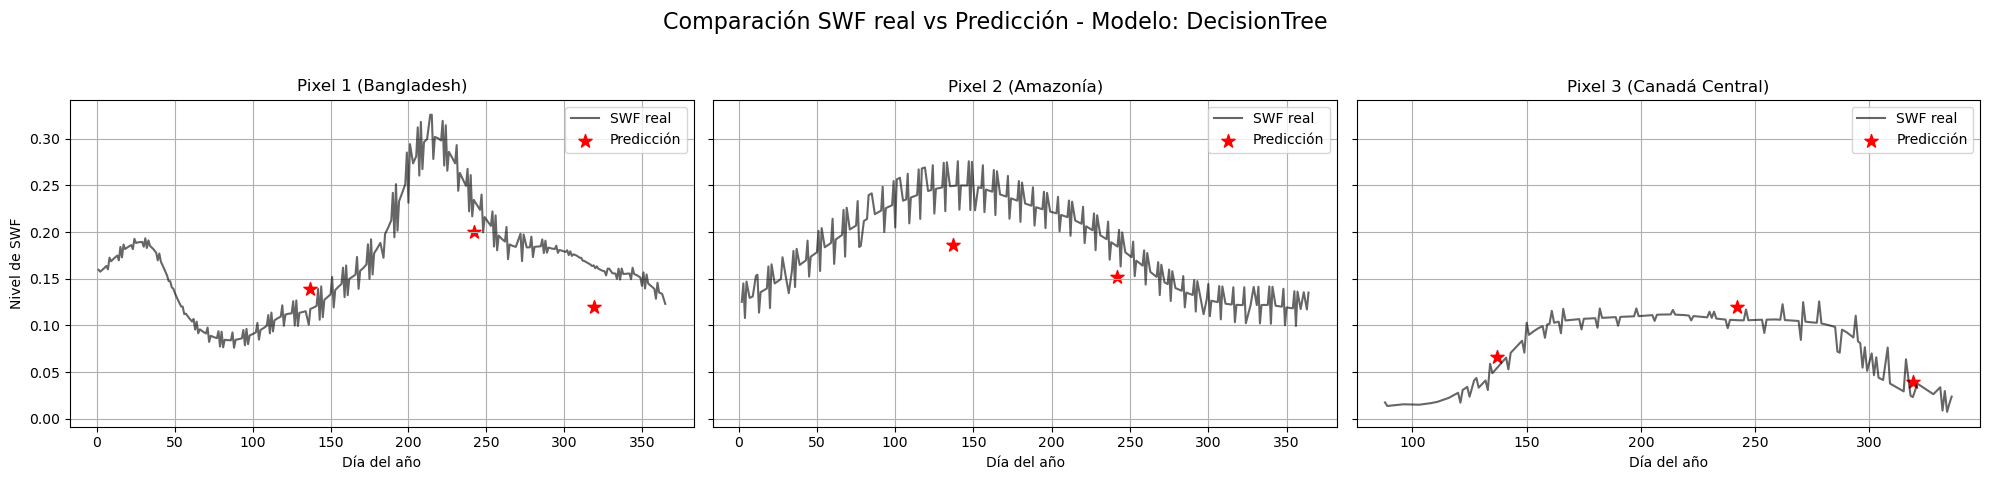

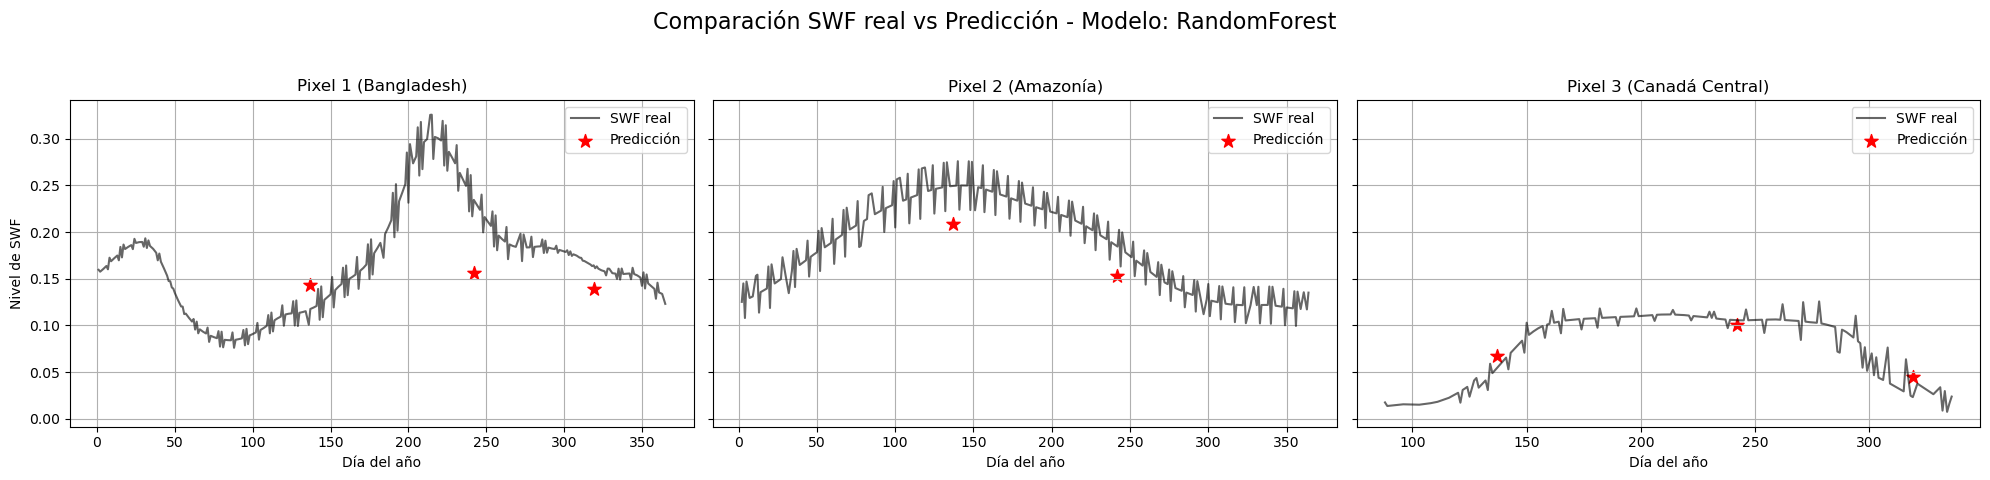

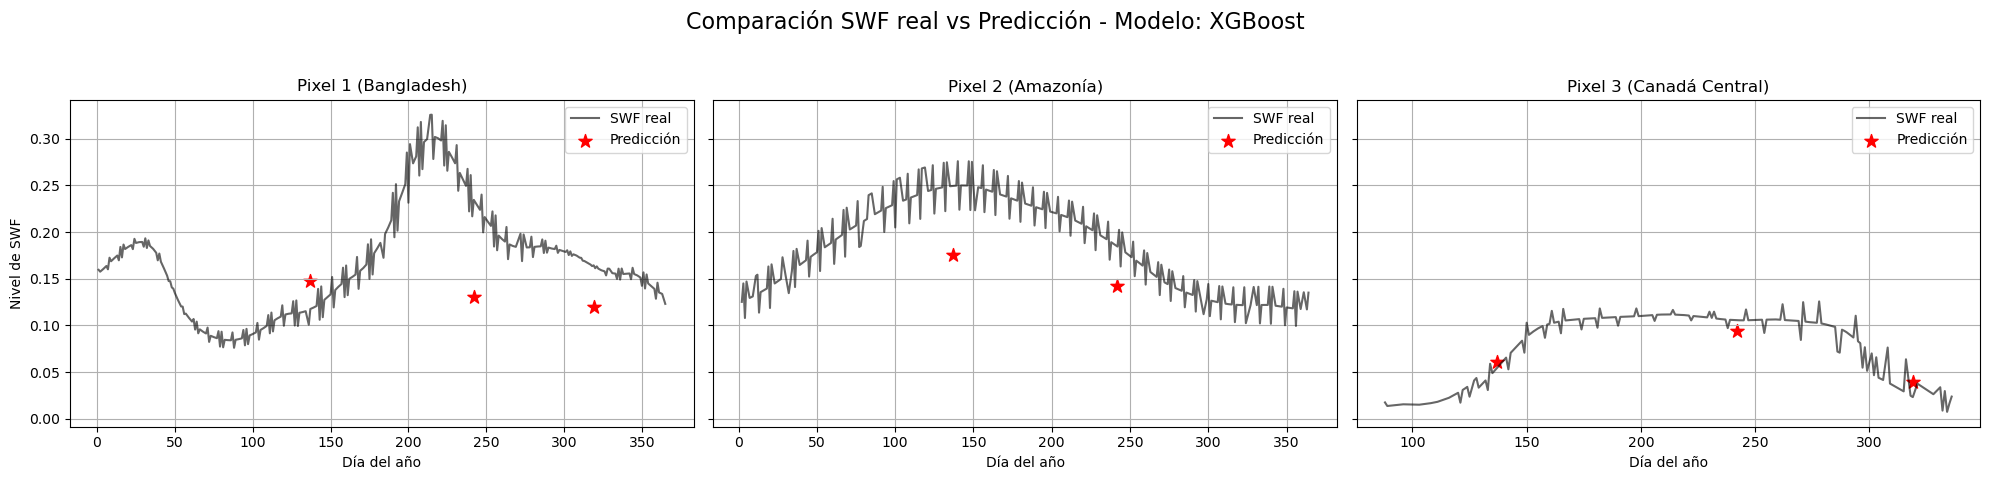

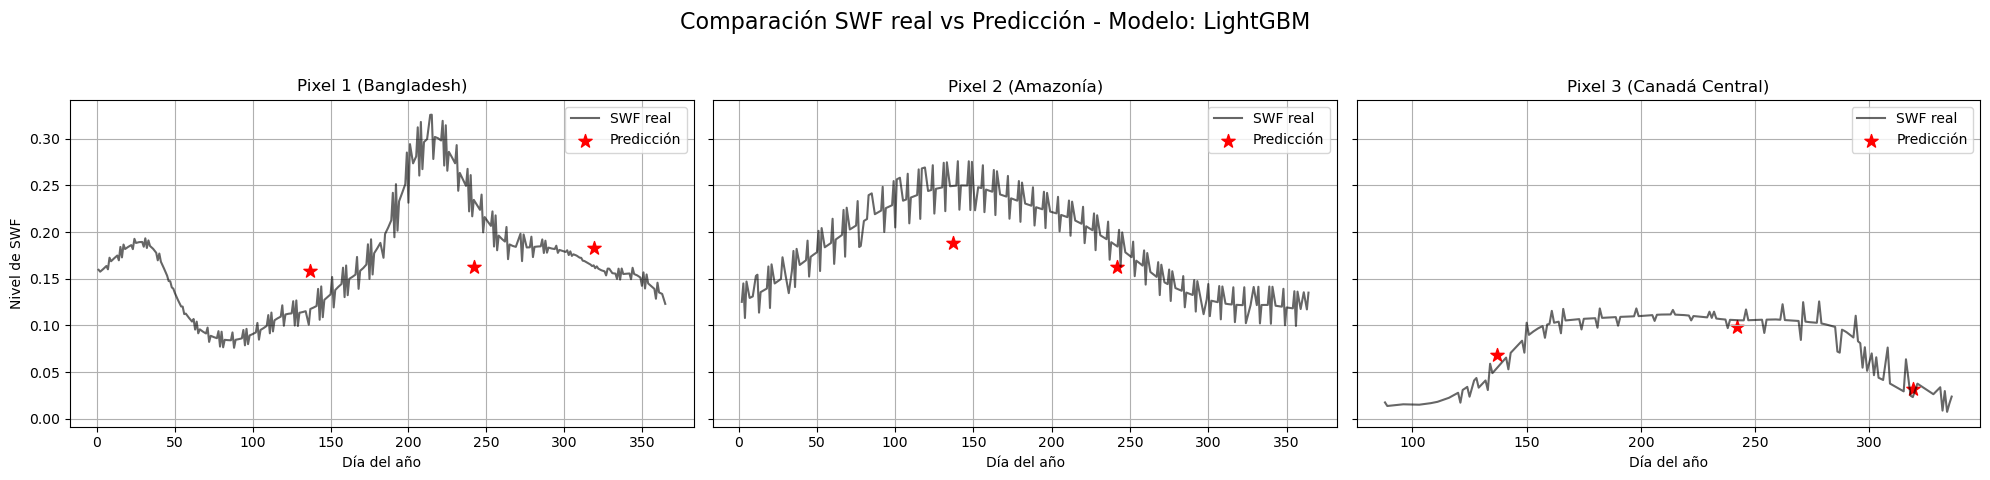

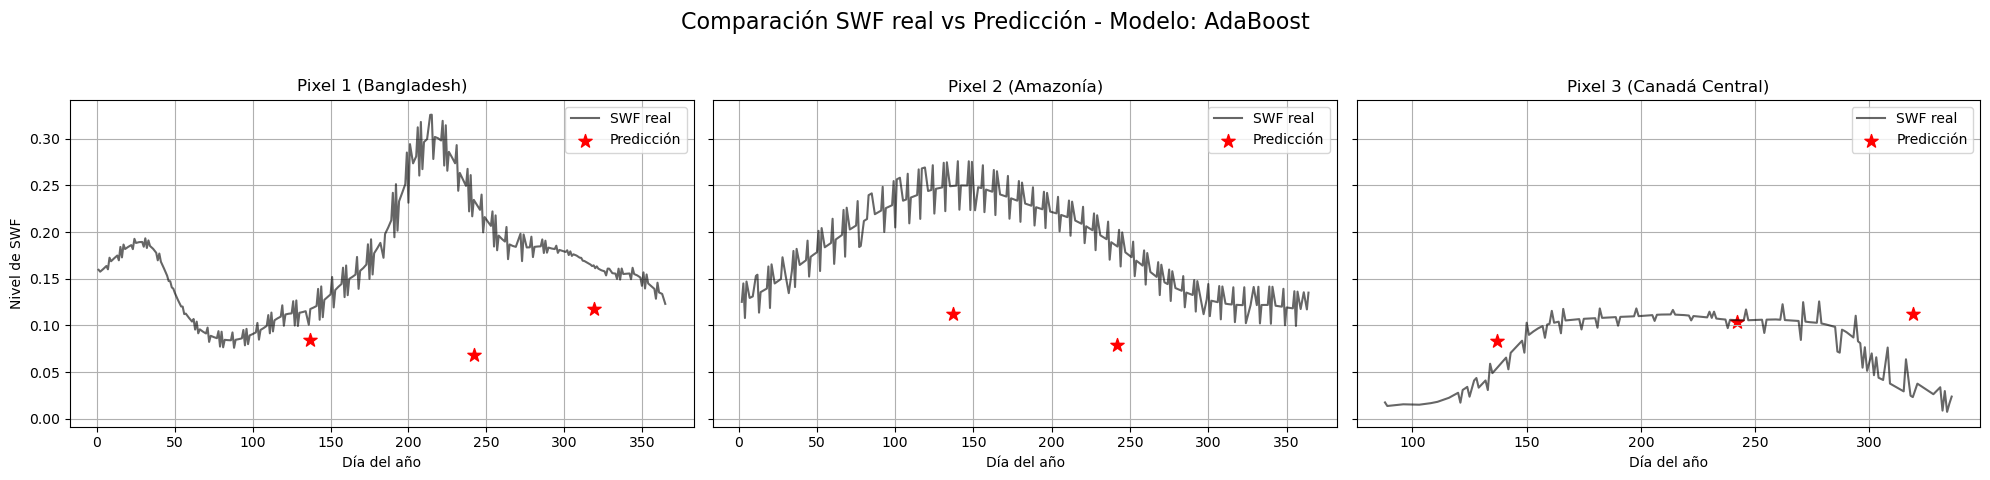

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# DEFINIR PUNTOS DE INTERÉS
# --------------------------
puntos = {
    "Pixel 1 (Bangladesh)": {"lat": 23.0632, "lon": 89.0922}, 
    "Pixel 2 (Amazonía)": {"lat": -3.2384, "lon": -58.7464},  
    "Pixel 3 (Canadá Central)": {"lat": 54.1685, "lon": -93.5014}
    
}

tol = 0.0005

# --------------------------
# EXTRAER SERIES REALES PARA CADA PUNTO
# --------------------------
series_reales = {}
for nombre, coords in puntos.items():
    df_punto = df_modeling[
        (np.abs(df_modeling["lat_var"] - coords["lat"]) < tol) &
        (np.abs(df_modeling["lon_var"] - coords["lon"]) < tol)
    ].copy()
    
    df_serie_real = df_punto.groupby("Date")["fwns"].mean().reset_index()
    df_serie_real.rename(columns={"fwns": "SWF_real"}, inplace=True)
    series_reales[nombre] = df_serie_real

# --------------------------
# LOOP POR MODELOS Y AGRUPAR DE 3 EN 3 PLOTS
# --------------------------
modelos_unicos = df_errores["modelo"].unique()

for modelo_objetivo in modelos_unicos:
    nombres_puntos = list(puntos.keys())

    for i in range(0, len(nombres_puntos), 3):
        fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
        fig.suptitle(f"Comparación SWF real vs Predicción - Modelo: {modelo_objetivo}", fontsize=16)

        for j, nombre in enumerate(nombres_puntos[i:i+3]):
            coords = puntos[nombre]
            df_serie_real = series_reales[nombre]

            # Filtrar predicciones
            df_errores_punto = df_errores[
                (df_errores["modelo"] == modelo_objetivo) &
                (np.abs(df_errores["lat"] - coords["lat"]) < tol) &
                (np.abs(df_errores["lon"] - coords["lon"]) < tol)
            ]
            df_key_preds = df_errores_punto.groupby("Date")["Predicho"].mean().reset_index()

            ax = axs[j]
            ax.plot(df_serie_real["Date"], df_serie_real["SWF_real"],
                    label="SWF real", color="black", linewidth=1.5, alpha=0.6)
            ax.scatter(df_key_preds["Date"], df_key_preds["Predicho"],
                       color="red", marker='*', label="Predicción", alpha=1, s=100)

            ax.set_title(nombre, fontsize=12)
            ax.set_xlabel("Día del año")
            if j == 0:
                ax.set_ylabel("Nivel de SWF")
            ax.grid(True)
            ax.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # deja espacio para el título
        plt.show()
